In [6]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns

In [8]:
# Load the credit card transaction data
df = pd.read_csv('C:/Users/KABYADE\Desktop/Fraud_ML/fraud-detection/algo/dataset/data_balanceada.csv')
#df.drop('step', axis = 1, inplace = True)
df=df.iloc[:,1:]
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFlaggedFraud,isFraud
0,139,265803.35,0.00,0.00,751669.39,1017472.74,0,1,0,0,0,0,0
1,589,11278.28,0.00,0.00,220970.84,232249.12,0,1,0,0,0,0,0
2,284,16363.06,35966.16,19603.10,0.00,0.00,0,0,0,1,0,0,0
3,37,107223.31,20752629.71,20859853.02,804594.62,571711.22,1,0,0,0,0,0,0
4,287,3678.25,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0


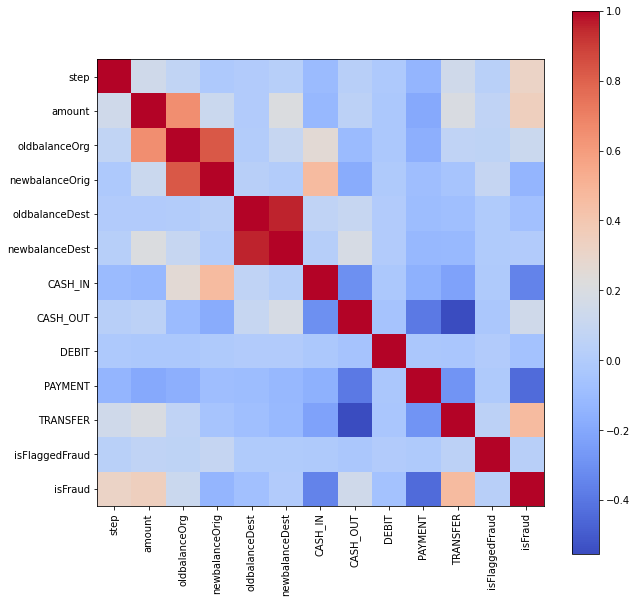

In [12]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap of the correlation matrix
plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(corr)), corr.columns, rotation=90)
plt.yticks(np.arange(len(corr)), corr.columns)
plt.show()

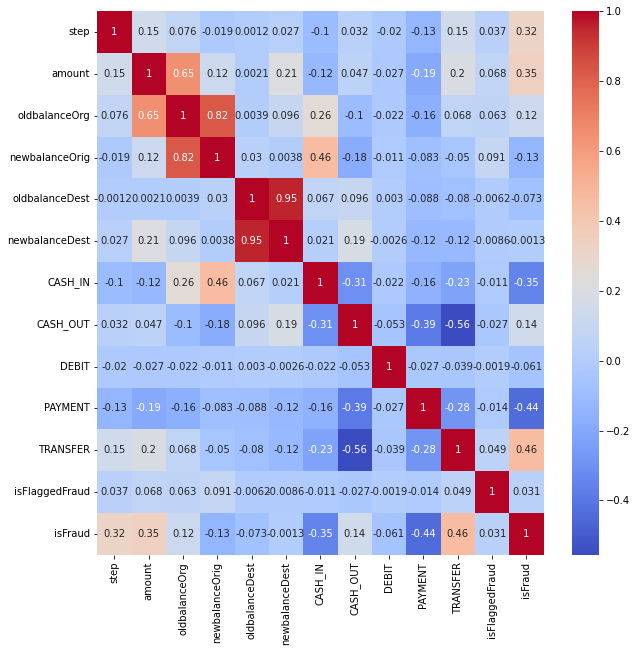

In [19]:
corr = df.corr()

# Plot the correlation matrix as a heatmap
# Create the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.show()


In [109]:
# Extract the highly correlated features (absolute correlation value >= 0.5)
highly_correlated_features = [
    column for column in corr.columns 
        if corr[column].sort_values(ascending=False).iloc[1] >= 0.5
    ]

# Keep only the highly correlated features
data = df[highly_correlated_features]
data.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [107]:
for column in corr.columns: 
    #if corr[column].sort_values(ascending=False).iloc[1] >= 0.1:
    print(round(corr[column].sort_values(ascending=False).iloc[1],2),"  ",column )

0.32    step
0.65    amount
0.82    oldbalanceOrg
0.82    newbalanceOrig
0.95    oldbalanceDest
0.95    newbalanceDest
0.46    CASH_IN
0.19    CASH_OUT
0.0    DEBIT
-0.01    PAYMENT
0.46    TRANSFER
0.09    isFlaggedFraud
0.46    isFraud


In [114]:
#features that have a high correlation with our target variable isFraud.
res=corr["isFraud"].sort_values(ascending=False)
res

isFraud           1.000000
TRANSFER          0.459360
amount            0.348276
step              0.318476
CASH_OUT          0.143626
oldbalanceOrg     0.124387
isFlaggedFraud    0.031225
newbalanceDest   -0.001263
DEBIT            -0.061053
oldbalanceDest   -0.072564
newbalanceOrig   -0.134427
CASH_IN          -0.352669
PAYMENT          -0.444990
Name: isFraud, dtype: float64